In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import date



symbols  = [ 'SPY', "QQQ", "VGK", "SCZ", "EWJ", "EEM", #eq
           'REM', "VNQ", "RWX", # re
           'TIP', "IEF", "TLT", "BWX", #fi
           'DBC', "GLD", #como
           'twtr', 'intc', 'tsm',"VWUSX", "Amc"]

all_stocks = pd.DataFrame()
 
for symbol in symbols:
    tmp_close = yf.download(symbol, 
                      start='2022-01-01', 
                      end= date.today(),
                      interval = "1d",
                      threads = True,
                      progress=False)['Adj Close']
    all_stocks = pd.concat([all_stocks, tmp_close], axis=1)
 
all_stocks.columns=symbols
all_stocks

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2021-12-31 00:00:00,474.959991,397.850006,68.239998,73.089996,66.959999,48.849998,34.509998,116.010002,35.599998,128.751770,114.889671,147.983932,28.247410,20.780001,170.960007,43.220001,51.110657,120.309998,65.029999,27.200001
2022-01-03 00:00:00,477.709991,401.679993,68.889999,73.430000,67.029999,49.200001,35.189999,115.099998,35.639999,128.014343,113.820694,144.099350,27.907681,20.860001,168.330002,42.660000,52.807728,128.800003,65.510002,26.520000
2022-01-04 00:00:00,477.549988,396.470001,68.980003,73.650002,67.910004,49.029999,35.310001,114.959999,35.570000,127.526039,113.760757,143.500168,27.907681,21.110001,169.570007,40.849998,52.738258,133.399994,64.040001,25.490000
2022-01-05 00:00:00,468.380005,384.290009,68.360001,72.919998,67.599998,48.230000,34.680000,111.669998,34.980000,126.489647,113.281212,142.721252,27.787775,21.020000,169.059998,39.500000,53.462738,127.059998,61.439999,22.750000
2022-01-06 00:00:00,467.940002,384.019989,68.110001,72.360001,67.099998,48.450001,34.790001,111.769997,34.860001,125.941551,113.001480,143.090744,27.737816,21.200001,166.990005,39.590000,53.601677,128.470001,61.209999,22.459999
2022-01-07 00:00:00,466.089996,379.859985,68.449997,72.290001,66.669998,48.889999,34.970001,111.029999,34.790001,125.792076,112.631836,142.062164,27.807760,21.240000,167.750000,39.669998,53.035988,123.500000,60.480000,22.990000
2022-01-10 00:00:00,465.510010,380.109985,67.519997,71.349998,66.510002,48.889999,34.930000,110.389999,34.610001,125.951515,112.601868,142.411697,27.837738,21.150000,168.259995,39.970001,54.792606,125.010002,60.509998,22.780001
2022-01-11 00:00:00,469.750000,385.820007,68.360001,72.260002,67.029999,50.020000,35.290001,110.559998,34.689999,126.828461,112.871613,143.360367,27.887697,21.559999,170.289993,40.660000,55.487316,129.169998,61.590000,22.790001
2022-01-12 00:00:00,471.019989,387.350006,68.989998,73.099998,67.989998,50.849998,35.310001,110.690002,34.849998,126.011307,112.891586,142.811127,28.117512,21.730000,170.740005,40.250000,55.318604,132.229996,61.610001,22.719999
2022-01-13 00:00:00,464.529999,377.660004,68.480003,72.540001,67.309998,50.130001,35.139999,110.470001,34.689999,126.041206,113.251244,144.079361,28.197449,21.500000,170.160004,38.700001,54.524647,139.190002,59.349998,20.660000


In [2]:
returns = np.log(all_stocks/all_stocks.shift(1))
returns.fillna(0)
retunrs = returns.iloc[1: , :]
retunrs

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2022-01-03 00:00:00,0.005773,0.009581,0.009480,0.004641,0.001045,0.007139,0.019513,-0.007875,0.001123,-0.005744,-0.009348,-0.026601,-0.012100,0.003842,-0.015503,-0.013042,0.032665,0.068189,0.007354,-0.025318
2022-01-04 00:00:00,-0.000335,-0.013055,0.001306,0.002992,0.013043,-0.003461,0.003404,-0.001217,-0.001966,-0.003822,-0.000527,-0.004167,0.000000,0.011913,0.007340,-0.043355,-0.001316,0.035091,-0.022695,-0.039613
2022-01-05 00:00:00,-0.019389,-0.031203,-0.009029,-0.009961,-0.004575,-0.016451,-0.018003,-0.029036,-0.016726,-0.008160,-0.004224,-0.005443,-0.004306,-0.004273,-0.003012,-0.033606,0.013644,-0.048693,-0.041447,-0.113721
2022-01-06 00:00:00,-0.000940,-0.000703,-0.003664,-0.007709,-0.007424,0.004551,0.003167,0.000895,-0.003436,-0.004343,-0.002472,0.002586,-0.001800,0.008527,-0.012320,0.002276,0.002595,0.011036,-0.003751,-0.012829
2022-01-07 00:00:00,-0.003961,-0.010892,0.004979,-0.000968,-0.006429,0.009041,0.005161,-0.006643,-0.002010,-0.001188,-0.003277,-0.007214,0.002518,0.001885,0.004541,0.002019,-0.010610,-0.039454,-0.011998,0.023323
2022-01-10 00:00:00,-0.001245,0.000658,-0.013680,-0.013088,-0.002403,0.000000,-0.001145,-0.005781,-0.005187,0.001267,-0.000266,0.002457,0.001077,-0.004246,0.003036,0.007534,0.032585,0.012153,0.000496,-0.009176
2022-01-11 00:00:00,0.009067,0.014910,0.012364,0.012673,0.007788,0.022850,0.010254,0.001539,0.002309,0.006938,0.002393,0.006639,0.001793,0.019200,0.011992,0.017116,0.012599,0.032736,0.017691,0.000439
2022-01-12 00:00:00,0.002700,0.003958,0.009174,0.011558,0.014220,0.016457,0.000567,0.001175,0.004602,-0.006464,0.000177,-0.003839,0.008207,0.007854,0.002639,-0.010135,-0.003045,0.023413,0.000325,-0.003076
2022-01-13 00:00:00,-0.013874,-0.025334,-0.007420,-0.007690,-0.010052,-0.014260,-0.004826,-0.001990,-0.004602,0.000237,0.003181,0.008841,0.002839,-0.010641,-0.003403,-0.039270,-0.014456,0.051297,-0.037372,-0.095046
2022-01-14 00:00:00,0.000409,0.006203,-0.002778,-0.004698,-0.001189,-0.000399,-0.003421,-0.009093,0.000576,-0.004517,-0.006905,-0.015225,-0.004973,0.012939,-0.002884,-0.006741,0.013739,0.010506,0.001515,-0.004366


In [253]:
from scipy.optimize import minimize, Bounds

lamb = 0.00005 #Faire attention car sinon il n'y a pas de mouvements de position
alpha = 1000000
Money = 1000
Pos = []

def objective_corr(pos):
    Pos.append(pos)
    pos = np.array(pos)
    s = abs(pos@np.corrcoef(returns.iloc[1: , :].fillna(0).T)@pos) + TC(pos) - alpha*returns.mean()@pos
    
    
    if TC(pos)>0.001:
        print('\033[92m'+"Cout rajoutés de transaction: "+str(TC(pos))+'\033[0m')
    print('\033[93m'+"Cout de mean: " + str(alpha*returns.mean()@pos) + '\033[0m')
    #print(f"Les valeurs  du vecteur poids sont:{pos.round(3)}")
    print(f"Les valeurs de la fonction objective:{s.round(3)}")
    return s

def TC(pos):
    if len(Pos)>1:
        return lamb*(all_stocks[-1::].values[0]@np.abs(np.array(pos)-np.array(Pos[-2])))
    else: 
        return lamb*(all_stocks[-1::].values[0]@np.abs(np.array(pos)))

cons = ({"type":"eq", "fun": lambda x: all_stocks[-1::].values[0]@np.array(x).T - Money}, 
        # The positions must invest no more than the initial money.
        # This constraints says that the inequalities (ineq) must be non-negative.
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        {"type": "ineq", "fun": lambda x: -np.sum(returns.mean()*x)+1}) 
 
 
#Every stock can get any position from 0 to Money
bounds = Bounds(0, Money)
 
# Initialize the weights with an even split
guess = [1./returns.shape[1] for x in range(returns.shape[1])]

# p0 = nombre de chaque stocks qui correspond a un investissement equitable par stocks
p0 = [Money/(returns.shape[1]*all_stocks[-1::].values[0][i]) for i in range(returns.shape[1])]
 
p = minimize(objective_corr, p0, 
             method = "SLSQP", 
             bounds=bounds, 
             constraints= cons)
p

Cout rajoutés de transaction: 0.05
Cout de mean: -62491.26484729306
Les valeurs de la fonction objective:62633.738
Cout de mean: -62491.264886586636
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.264914215964
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.2648705718
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.26488015533
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.26486964934
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.26484846092
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.26487494375
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.26490365695
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.26487120114
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.26486327953
Les valeurs de la fonction objective:62633.688
Cout de mean: -62491.26486152019
Les valeurs de la fonction objective:62633.688
Cout

     fun: -136821.91266527958
     jac: array([ 2634.7734375 ,  4489.00390625,  1560.61523438,  2204.62695312,
        1508.07421875,    81.46484375,  1855.4375    ,  3786.83203125,
        1603.56445312,  1090.43945312,   968.16601562,  2017.39648438,
         904.93554688, -3128.38867188, -1009.4453125 ,  6782.15234375,
        3711.77734375,   235.72070312,  6175.87304688, 12302.99414062])
 message: 'Positive directional derivative for linesearch'
    nfev: 557
     nit: 24
    njev: 20
  status: 8
 success: False
       x: array([1.15395496e-05, 0.00000000e+00, 6.08044715e-12, 2.53622158e-12,
       6.36294685e-12, 3.58217235e-06, 4.19107656e-12, 0.00000000e+00,
       5.59727264e-12, 2.15040263e-06, 2.09948424e-06, 4.13022644e-12,
       9.41892860e-12, 4.31406588e+01, 1.75906338e-05, 0.00000000e+00,
       0.00000000e+00, 6.86891939e-06, 0.00000000e+00, 0.00000000e+00])

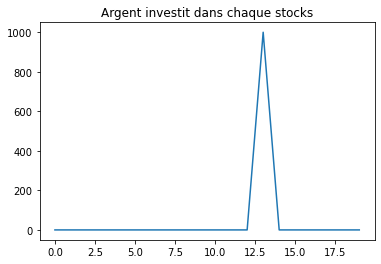

L'argent est le plus investit dans l'action: DBC


In [255]:
plt.plot([p.x[i] * all_stocks[-1::].values[0][i] for i in range(len(p.x))])
plt.title("Argent investit dans chaque stocks")
plt.show()
print("L'argent est le plus investit dans l'action: "+symbols[np.argmax([p.x[i] * all_stocks[-1::].values[0][i] for i in range(len(p.x))])])

In [251]:
# On a bien investit au total: Money=1000
np.dot(all_stocks[-1::].values[0],np.array(p.x).T)

1000.0000000137095

In [254]:
# Le returns avec une telle repartition de portefeuille est de:
np.sum(returns.mean()*p.x)

0.1386830296477457

In [201]:
print("Nombre d'action acheté pour chaque symbols: ")
r = pd.DataFrame([symbols,p.x])
for i in range(len(symbols)):
    print(symbols[i],p.x[i].round(3))

Nombre d'action acheté pour chaque symbols: 
SPY 0.063
QQQ 0.0
VGK 0.0
SCZ 0.941
EWJ 1.198
EEM 1.33
REM 2.43
VNQ 0.761
RWX 1.982
TIP 1.125
IEF 0.435
TLT 0.299
BWX 2.528
DBC 4.178
GLD 0.437
twtr 0.0
intc 1.602
tsm 0.0
VWUSX 0.0
Amc 0.0
